# Statistics and Survey Design
--------------

Big question: How do you decide where and when to measure?

In [12]:
import scipy.stats as spst
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200
plt.rcParams['axes.titlesize'] = 24
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16

### Today's Goals:
* Statistics on data
* Discuss aspects of designing surveys

# Statistics

Q: When we take a measurement in the real world should we ever use an interpretation that exactly matches our measurement?

## Errors in data
Measurements always have sources of uncertainties.

What can we do to reduce them?

## Basic Idea:
If their is noise, take many measurements and average them, hopefully the noise is cancelled out or reduced.

In [13]:
true = np.r_[1, 1]
rng = np.random.default_rng(4421)

obs = true + rng.standard_normal((3312, 2))

avg = np.mean(obs, axis=0)
avg

array([1.03724356, 1.00279048])

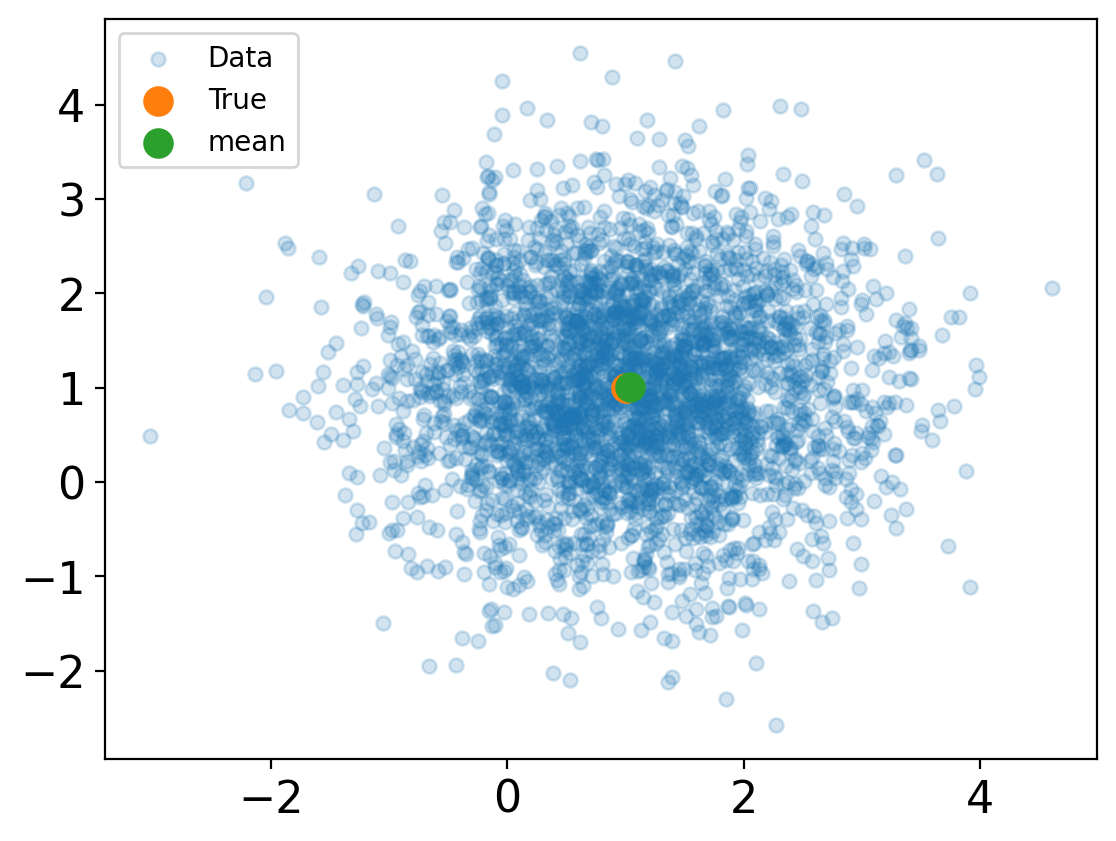

In [15]:
plt.scatter(obs[:, 0], obs[:, 1], alpha=0.2, marker='.', label='Data')
plt.scatter(true[0], true[1], label='True')
plt.scatter(avg[0], avg[1], label='mean')
plt.legend()

# Probability distributions

Measurements are statistical in nature, their errors usually follow some unknown probability distribution.

Distributions are either:
* Discrete
* Continuous

## Discrete distributions
Described by a Probability Mass Function (PMF).
* Describes the probability that a specific value occurs.
* Formally:
$$ p_X(x) = P(x=X)$$
$$ \sum_x p_X(x) = 1 $$
$$ p_X(x) >= 0 $$

Common discrete distributions:
* Binomial: Number of success in a specific number of tests with a given probability of success.
* Poisson: Number of expected events in a given amount of time, with a given probability of success. (a limit of the Binomial distribution)

Text(0, 0.5, 'Probability')

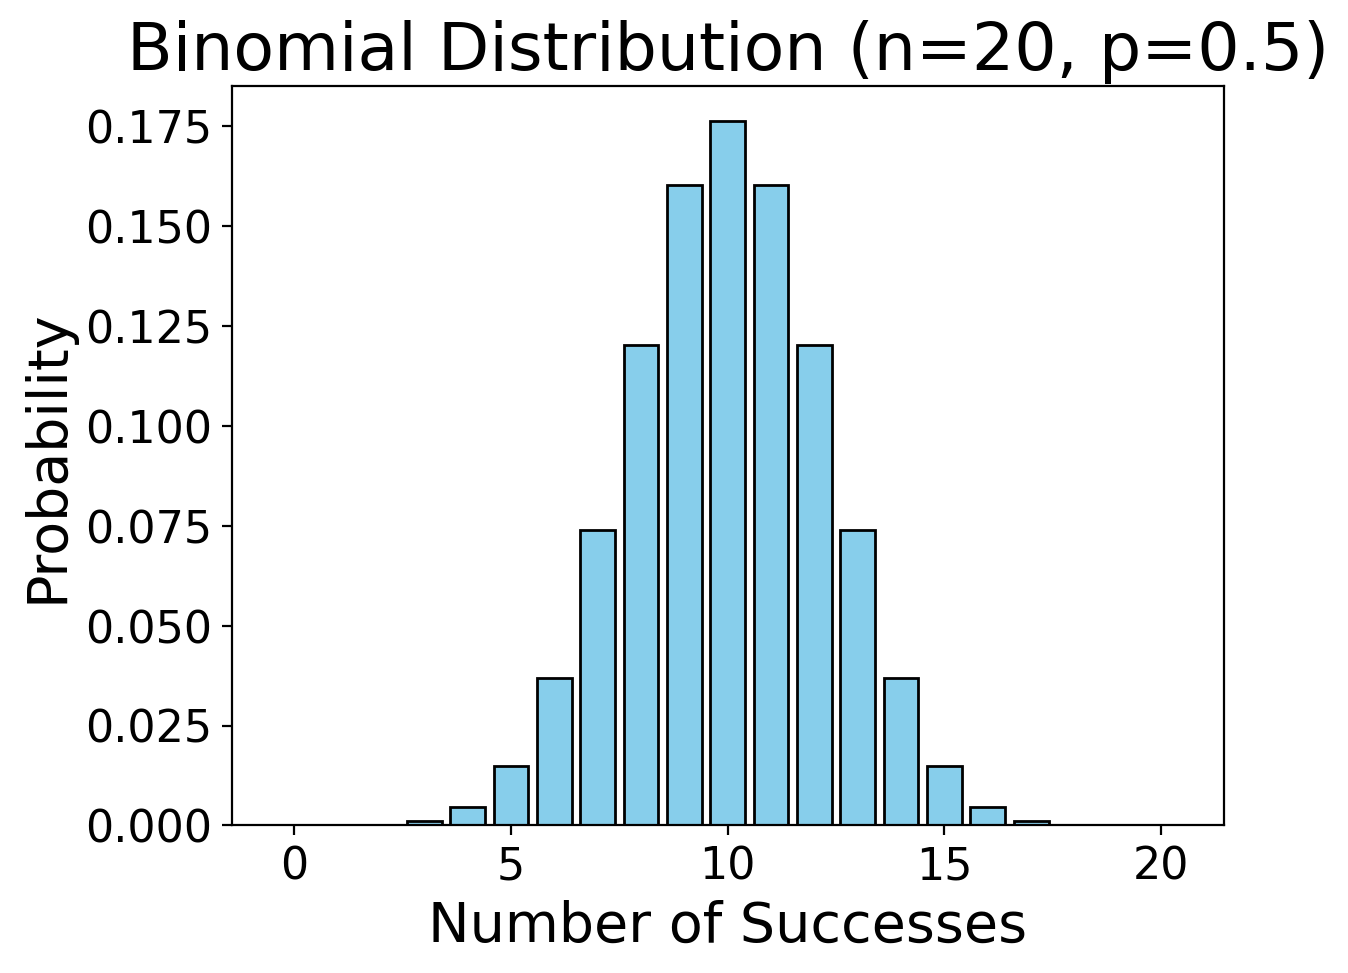

In [22]:
# Parameters
n = 20          # Number of trials
p = 0.5         # Probability of success

x = np.arange(0, n+1)

pmf_values = spst.binom.pmf(x, n, p)

# Plotting
plt.bar(x, pmf_values, color='skyblue', edgecolor='black')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlabel('Number of Successes')
plt.ylabel('Probability')

## Continuous distributions
Continuous distributions describe a probability density function.
* They are not probabilities of a specific event happening, more they can be used to find probabilites that a random variable will be *between* two values.
* Formally:
$$ Pr[a <= X <= b] = \int_a^b f_X(x) dx $$
$$ \int_{-\infty}^{\infty} f_X(x) dx = 1 $$
$$ f_X(x) >= 0 $$

Common distributions
* Uniform
* Exponential
* Laplace (or double exponential)
* Normal (or Gaussian)
* Chi-squared
* Student's T-distribution

A ton available through scipy see [here](https://docs.scipy.org/doc/scipy/reference/stats.html#continuous-distributions)

Text(0, 0.5, 'Probability')

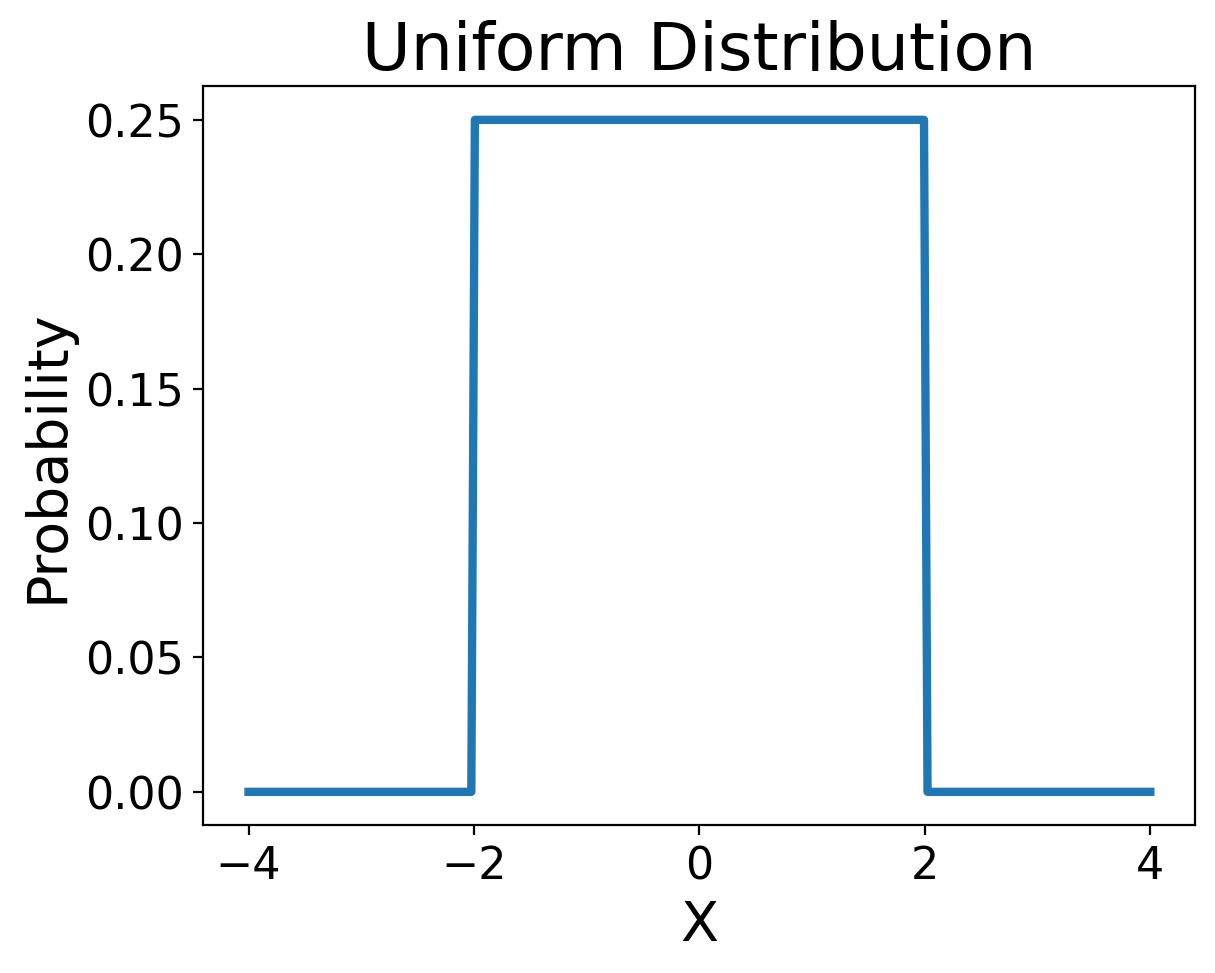

In [25]:
x = np.linspace(-4, 4, 256)

pdf = spst.uniform.pdf(x, -2, 4)

# Plotting
plt.plot(x, pdf)
plt.title(f'Uniform Distribution')
plt.xlabel('X')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

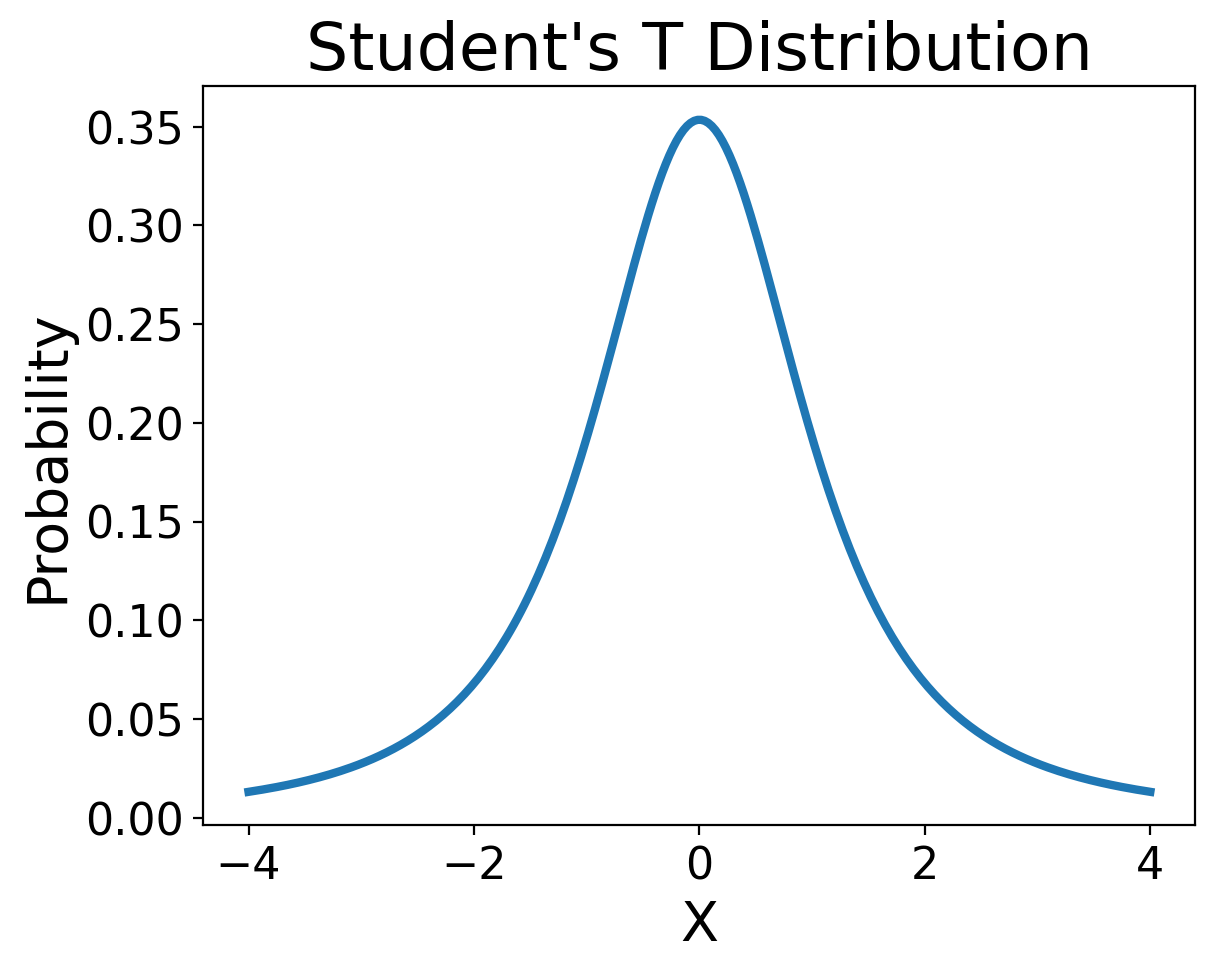

In [26]:
x = np.linspace(-4, 4, 256)
pdf = spst.t.pdf(x, 2)

# Plotting
plt.plot(x, pdf)
plt.title(f"Student's T Distribution")
plt.xlabel('X')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

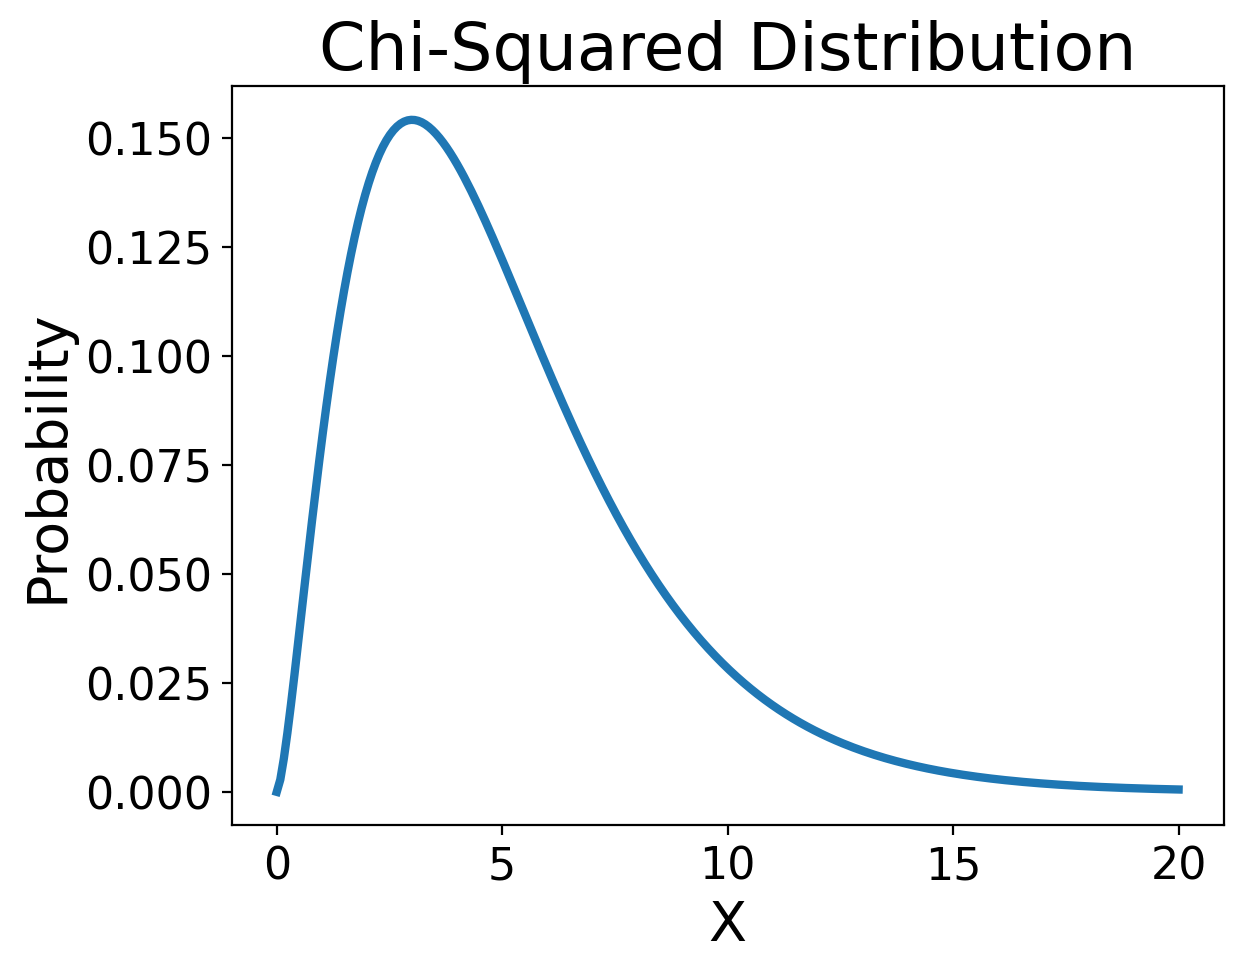

In [27]:
x = np.linspace(0, 20, 256)
pdf = spst.chi2.pdf(x, 5)

# Plotting
plt.plot(x, pdf)
plt.title(f"Chi-Squared Distribution")
plt.xlabel('X')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

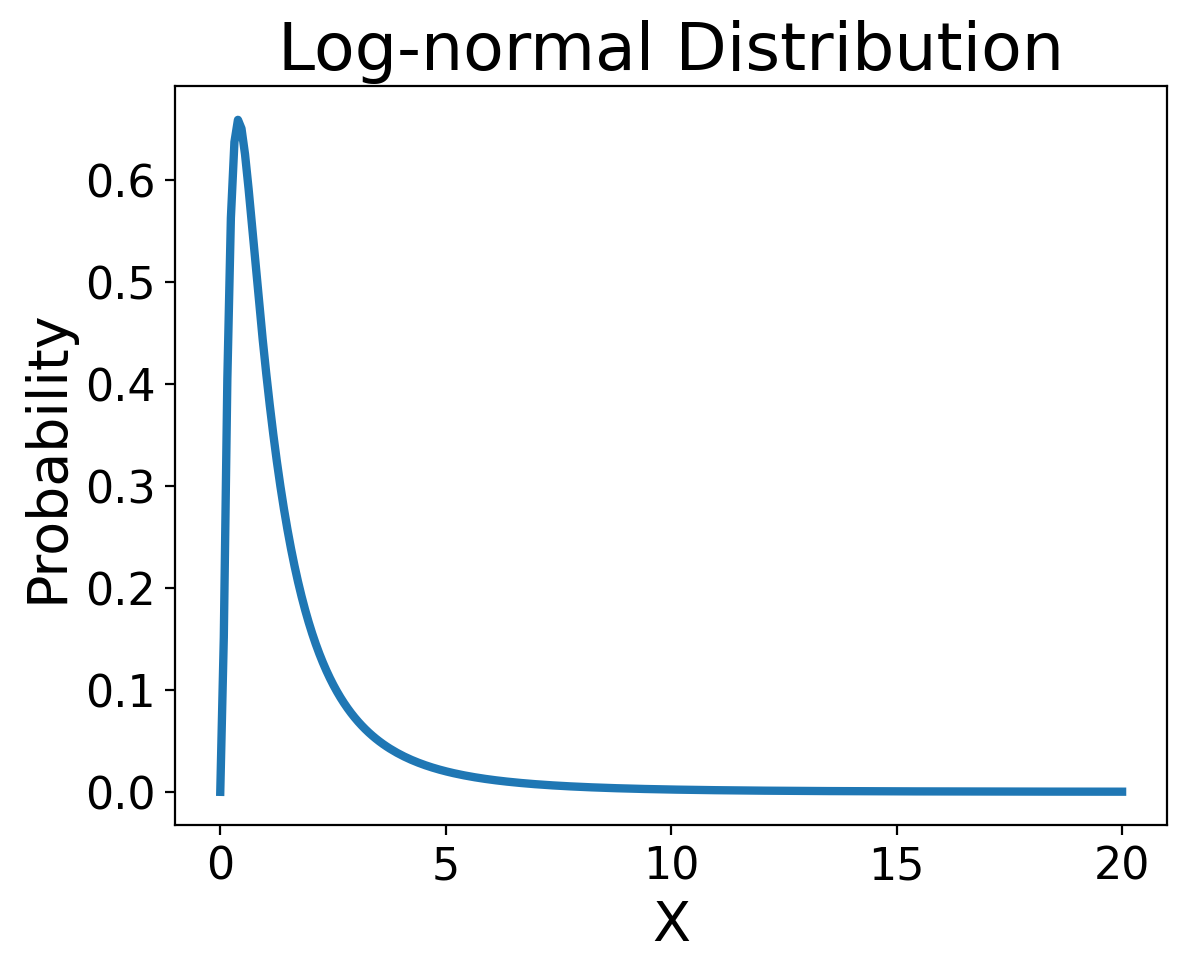

In [36]:
x = np.linspace(0, 20, 256)
pdf = spst.lognorm.pdf(x, 0.954)

# Plotting
plt.plot(x, pdf)
plt.title(f"Log-normal Distribution")
plt.xlabel('X')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability')

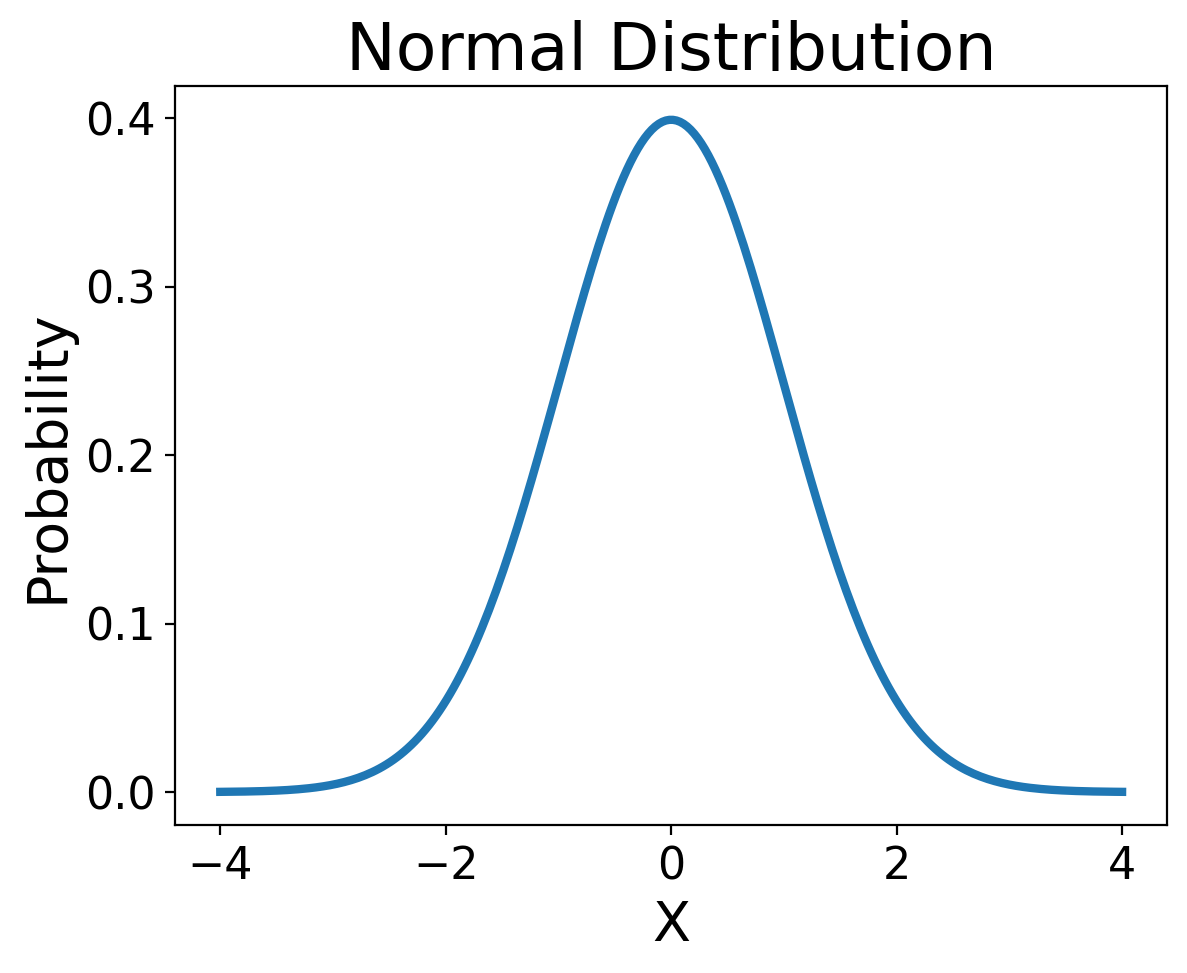

In [37]:
x = np.linspace(-4, 4, 256)
pdf = spst.norm.pdf(x, 0)

# Plotting
plt.plot(x, pdf)
plt.title(f"Normal Distribution")
plt.xlabel('X')
plt.ylabel('Probability')

## Properties of sets of samples
* Sample: A draw (or draws) from a random process

Multiple samples usually described by
* Means ($\mu$)
* Standard deviations ($\sigma$) (or variances $\sigma^2$)

Q: If I take two sets of 10 measurements, average each individually, will I get the same value?

### Implies:
Sample averages (means) are also randomly distributed!

P.S. Sample standard deviations are also randomly distributed.

Sample Mean:
$$ \bar{x} = \frac{1}{n}\sum_{i=1}^{n} x_i \neq \mu$$.

(Population) Variance:
$$ \sigma^2 = \frac{1}{n}\sum_{i=1}^{n} (x_i - \mu)^2 $$


Sample Variance (note $\bar{x}$ instead of $\mu$ and $n-1$ in division):
$$ \sigma^2 = \frac{1}{n - 1}\sum_{i=1}^{n} (x_i - \bar{x})^2 $$

## The Central Limit Theorem:
Given enough samples, the distribution of means ($\tilde{X}_n$) tends towards a normal distribution with mean, $\mu$ (population/true mean), and variance ($\sigma^2/2$), **regardless of the distribution of $X$**

P.S. The sample variance follows a chi-squared distribution

Why is this important?

Most of the time we do not take a single value to represent a measurement commonly we:
* Average a single location over time to reduce the effects of random noise, and average out consistantly variable noise (i.e. a sine wave like error source).
* Take many measurements close together in space (i.e. on an airborne system) and average them together.

## Estimating errors
So how do we estimate the error in our measurements (or at least a range of possible values)?

Say we take measurements of a value at a single location over time and obtain the following values.

In [38]:
my_data = np.array([1.0, 1.5, 2.3, 3.1, 0.5, 2.4, 3.2, 2.3, 2.1, 4.2, 0.0, 1.9])

Text(0, 0.5, 'Counts')

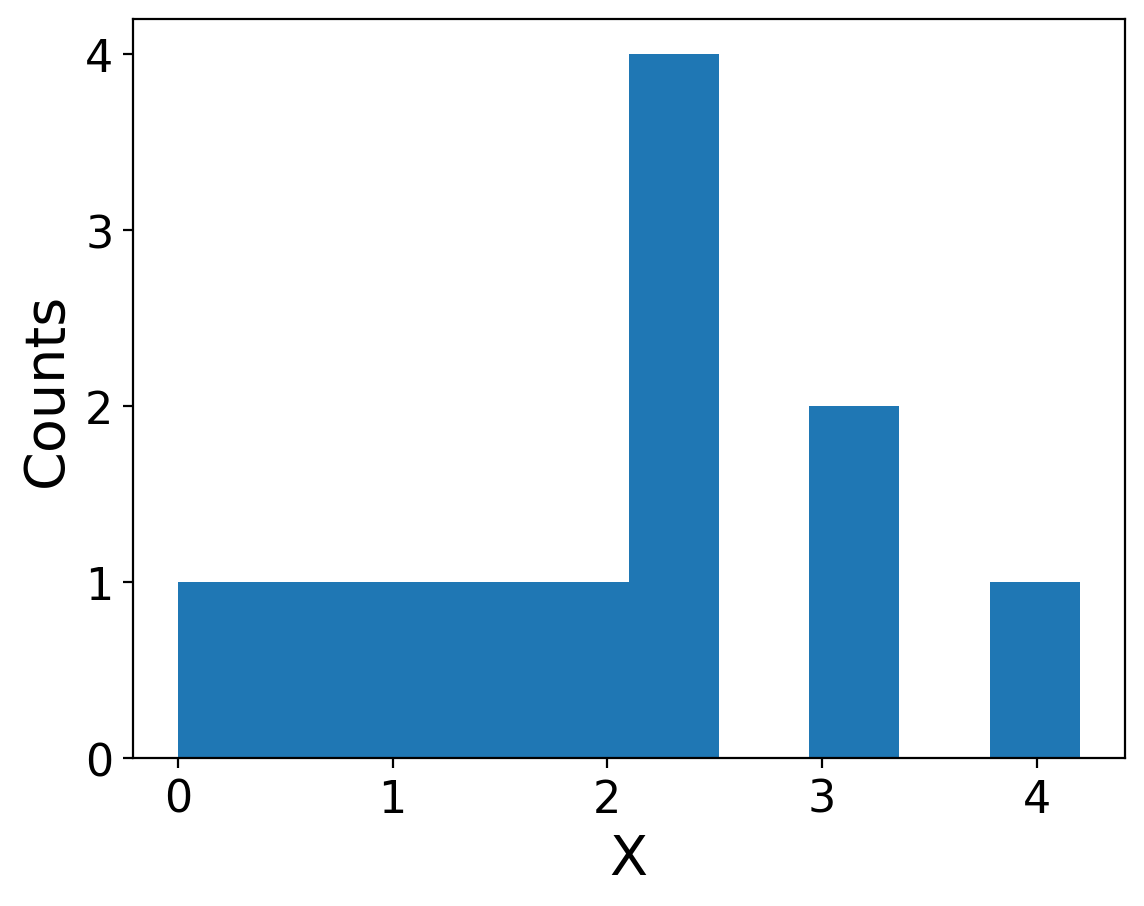

In [39]:
plt.hist(my_data, 10);
plt.xlabel('X')
plt.ylabel('Counts')

As we take more and more values, we might expect the shape of this histogram to match the shape of the true distribution

We can calculate the mean and standard deviation of this data:

In [40]:
np.mean(my_data)

np.float64(2.0416666666666665)

In [41]:
np.std(my_data, ddof=1)

np.float64(1.1804916797930454)

These numbers define the mean and standard deviation of our samples.

But, what is the error in the mean?

Turns out, that in the central limit theorem, the mean tends towards a normal distribution with a standard deviation of:
$$ \sigma_{mean}^2 = \frac{\sigma^2}{n}$$

* As we take more samples, the standard deviation gets smaller

### Questions: 
I average 2 samples from a distribution who's standard deviation is $\sigma=20$:

1) What is the standard deviation of my average value?

In [42]:
print(np.sqrt(20**2 / 2))

14.142135623730951


2) If I instead average 4 measurements, what is the standard deviation?

In [43]:
print(np.sqrt(20**2 / 4))

10.0


**note**: taking 4 measurements decreased the standard deviation by 1/2

3) What about for 6, 8, 10, 12, 14, 16?

In [45]:
for n in [6, 8, 10, 12, 14, 16]:
    s_mean = np.sqrt(20**2/n)
    print(n, s_mean)

6 8.16496580927726
8 7.0710678118654755
10 6.324555320336759
12 5.773502691896258
14 5.3452248382484875
16 5.0


* going from 1 to 4 measurements decreased the error by 1/2
* going from 4 to 16 measurements decreased the error by 1/2

In general, it is commonly understood that the error in your measurement decreases by a factor of 
$$ \frac{1}{\sqrt{n}} $$

In [46]:
1 / np.sqrt(4096)

np.float64(0.015625)

# Survey Design
Where and when do we take measurements?

In [48]:
from IPython.display import IFrame

The Wagon-Wheel problem

In [49]:
IFrame(src='https://michaelbach.de/ot/mot-wagonWheel/index.html', width=600, height=400)

In [182]:
# Consider these measurements:
x = np.linspace(0, 2 * np.pi, 9)
f_1d = lambda v: np.sin(2 * np.pi / 1 * v)

Text(0.5, 1.0, 'f(x)')

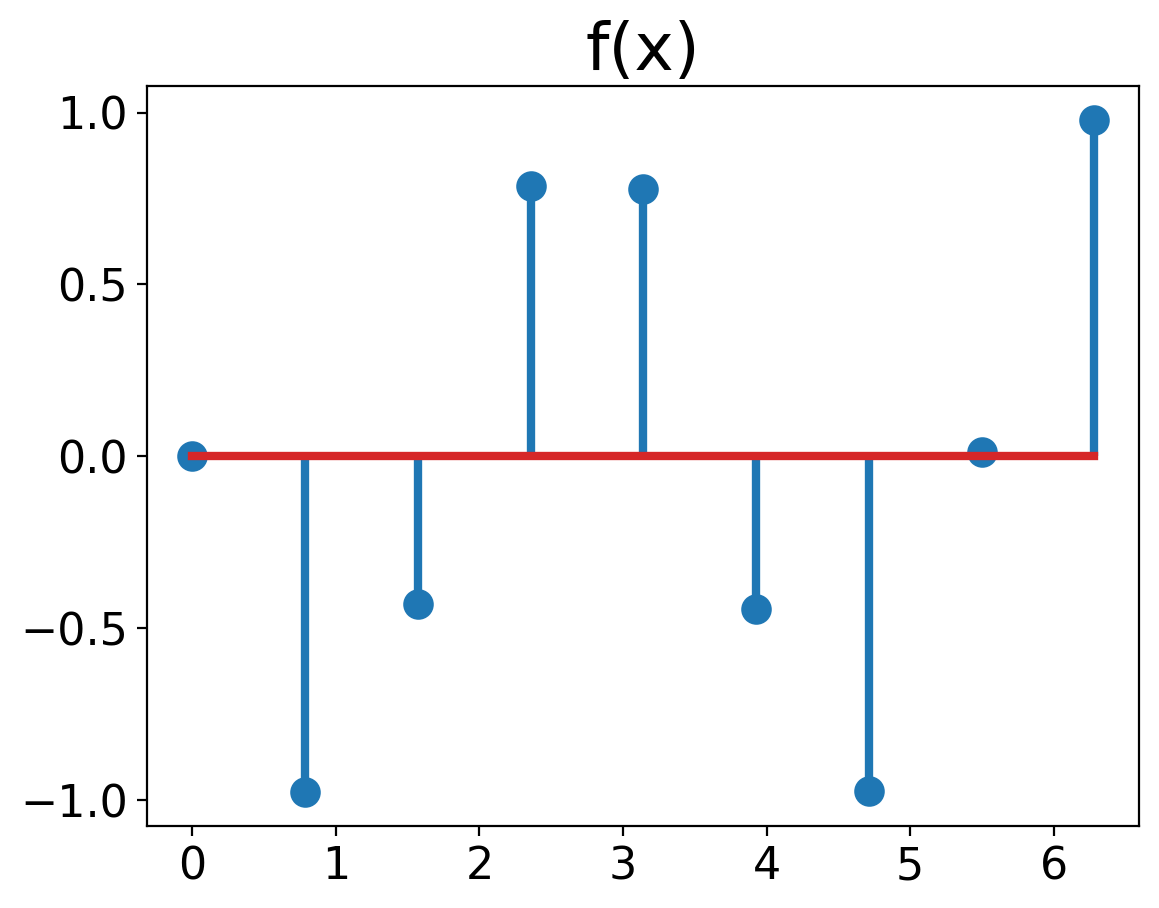

In [183]:
plt.stem(x, f_1d(x))
plt.title('f(x)')

How would you interpret this?

What about this?

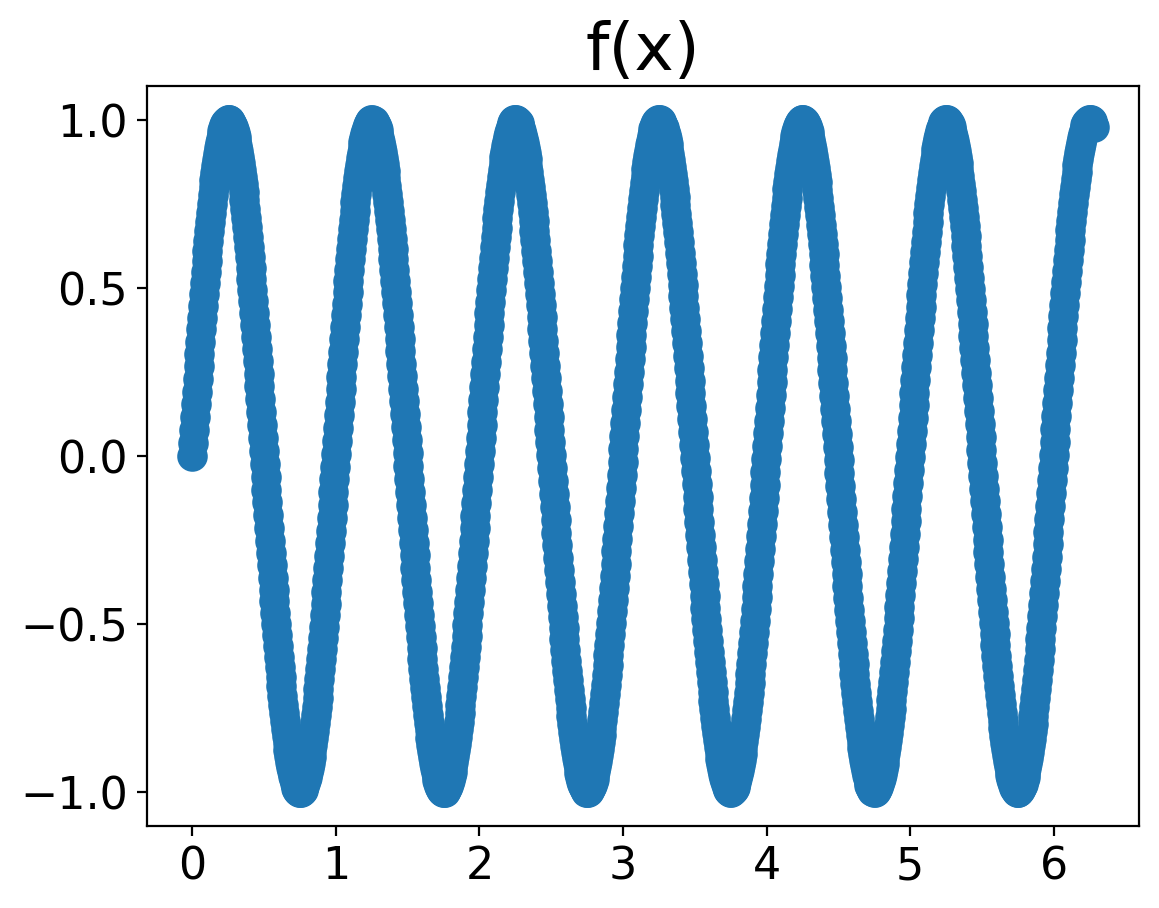

In [184]:
x2 = np.linspace(0, 2 * np.pi, 1024); plt.scatter(x2, f_1d(x2)); plt.title('f(x)');

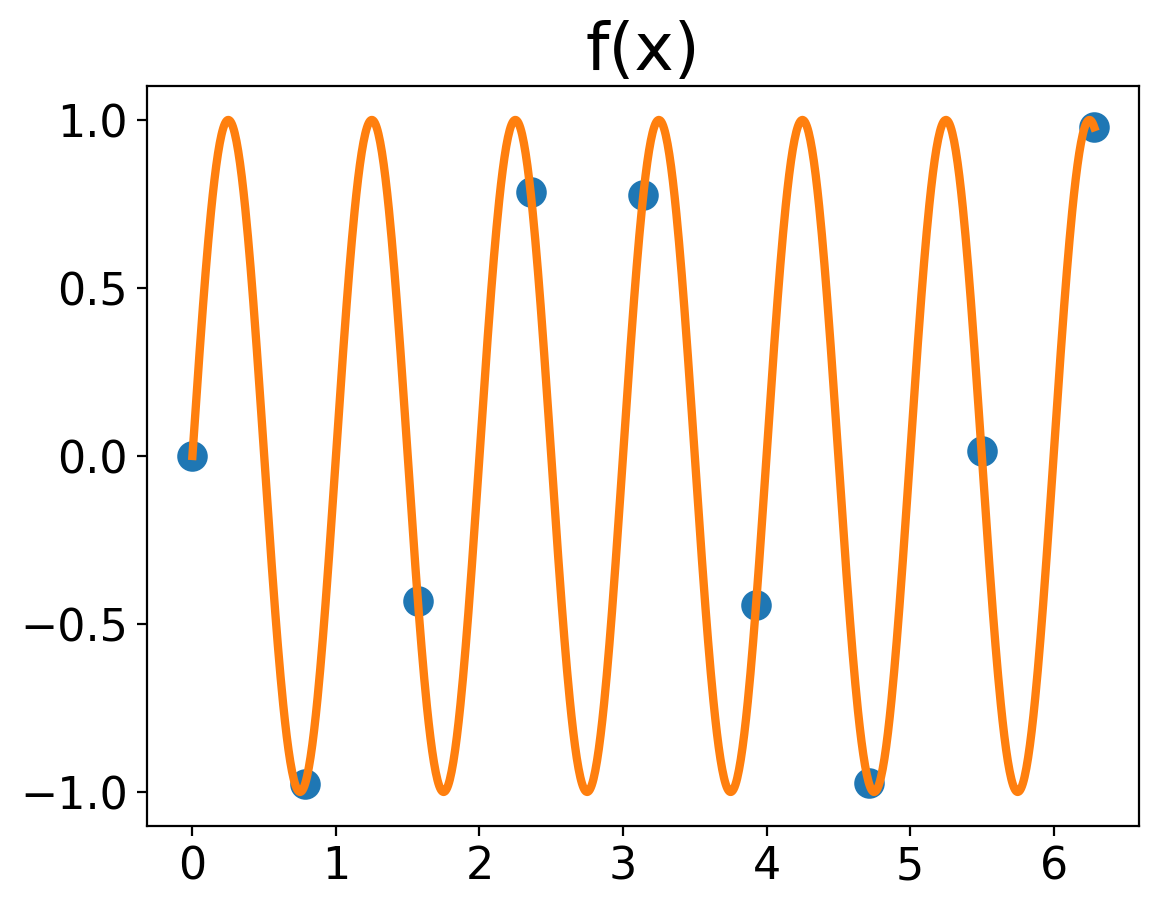

In [185]:
plt.scatter(x, f_1d(x)); plt.plot(x2, f_1d(x2), color='C1'); plt.title('f(x)');

# Uh - oh

In [186]:
x2_1, y2_1 = np.mgrid[-5:5:10j, -5:5:10j]
x2_2, y2_2 = np.mgrid[-5:5:30j,-5:5:30j]
f1 = lambda x,y: np.exp(-(x**2/4 + y**2))
f2 = lambda x,y: np.exp(-((x-2.25)**2/0.125 + (y+2.25)**2/0.125))
f_2d = lambda x,y: f1(x, y) + f2(x, y)

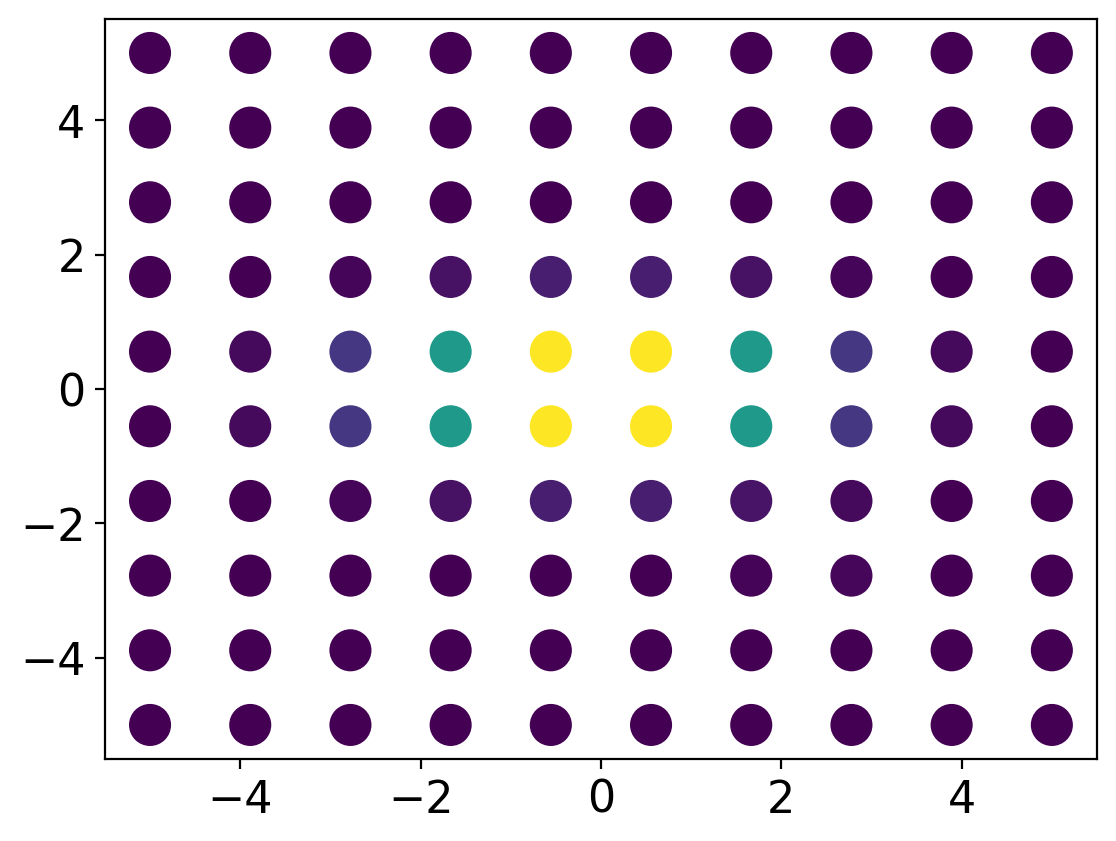

In [187]:
plt.scatter(x2_1, y2_1, c=f_2d(x2_1,y2_1), s=200)

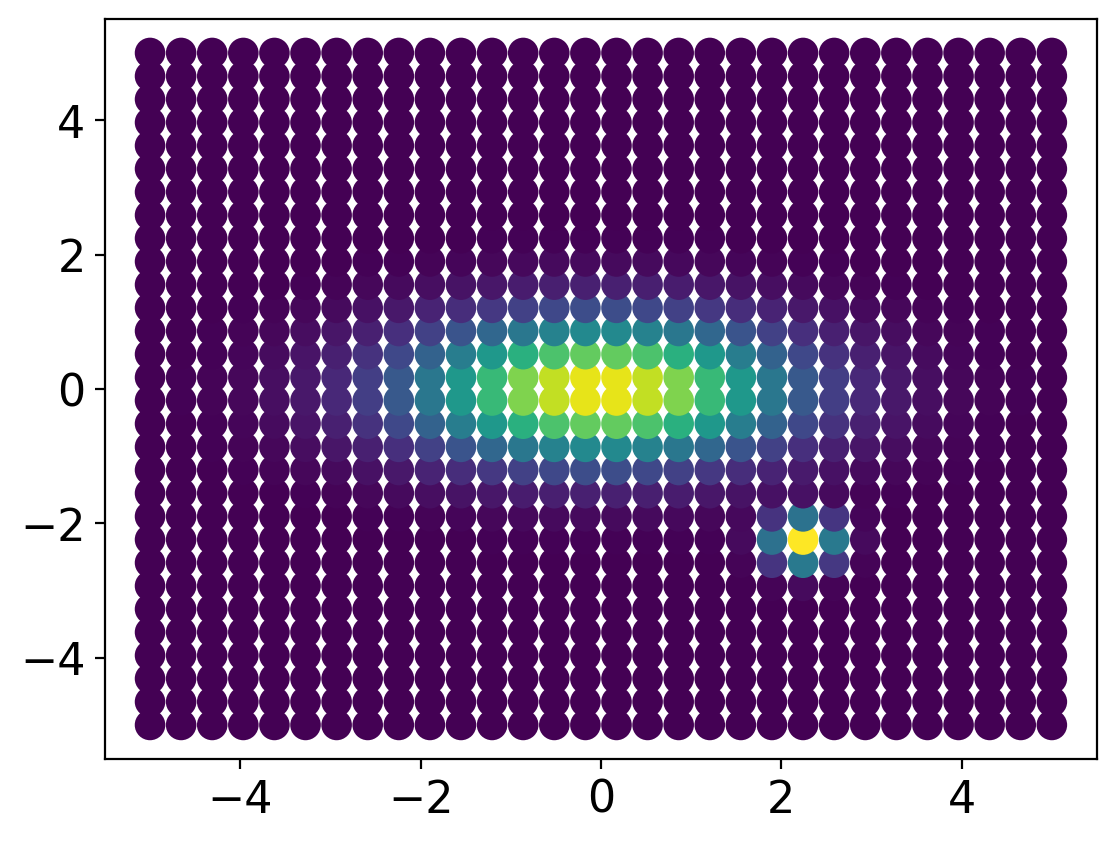

In [188]:
plt.scatter(x2_2, y2_2, c=f_2d(x2_2,y2_2))

Sneaky little thing...

### Questions:

What is the technical term for this effect?

What must we know ahead of time to determine how often to take a measurement?

## Nyquist–Shannon sampling theorem:

**Theorem**:
* If a function $x(t)$ contains no frequencies higher than $B$ hertz, then it can be completely determined from its ordinates at a sequence of points spaced less than $1/(2B)$ seconds apart.

Stated another way:
* If signal changes at a rate of $B$ 1/unit (hertz = 1/s, or 1/m for spatial sampling), you must take measurements at a rate of at least $2B$.

Note: There are other sampling theorems out there (Google sparse sampling for some crazy theorems on matrix completion).

# Aliasing
Is what happens when we don't sample often enough (in time or space).

Higher frequencies look like lower frequencies, because we are not measuring continuously

Text(0.5, 1.0, 'f(x)')

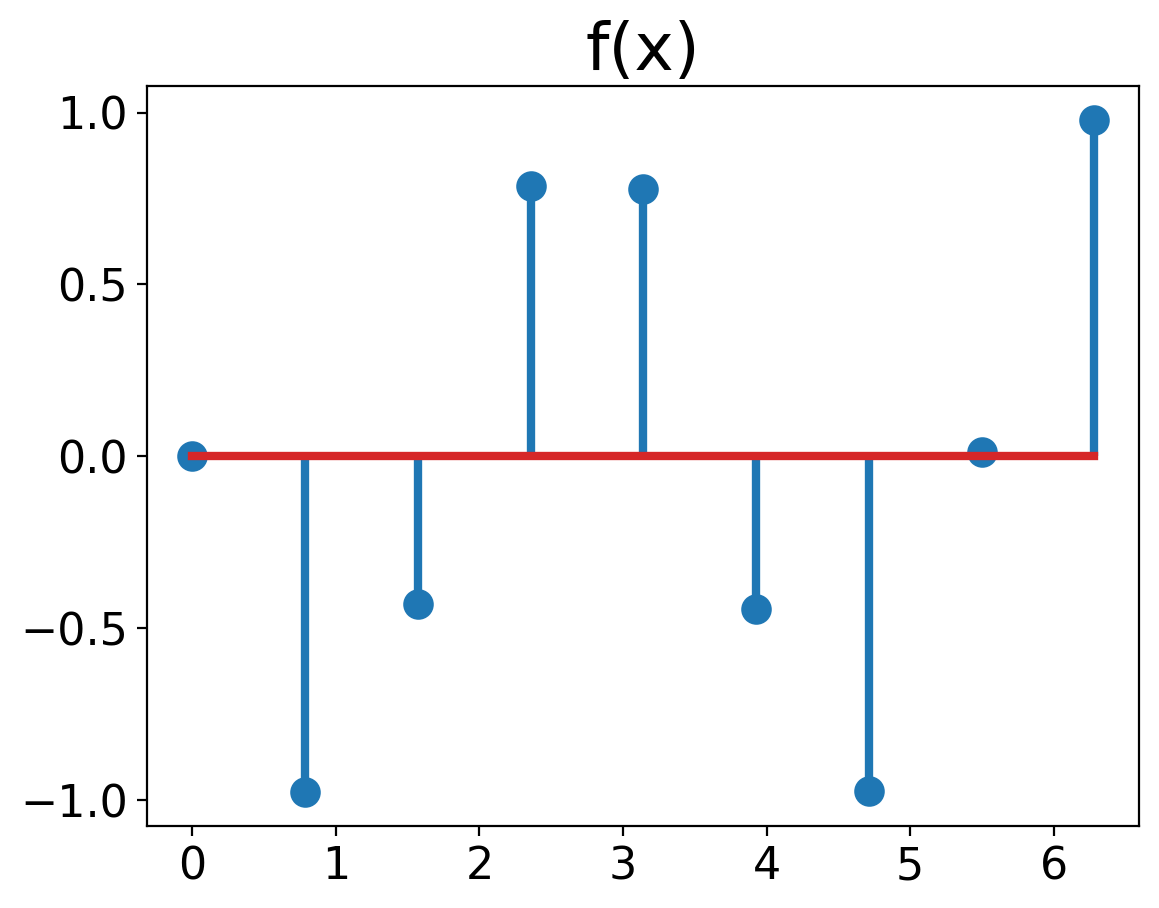

In [189]:
plt.stem(x, f_1d(x))
plt.title('f(x)')

## How do we mitigate aliasing?
Usually easier in time than space

In time:
* analogue filters before the discrete recordings

In space:
* Requires knowledge of the physics and expected targets.

# Other aspects of survey design

Your biggest restriction in survey design is usually physical access
* Impassible terrain
* Dense vegetation
* Lions, tigers and bears (oh my)
* Legal permission

For legal permission, you can look up land owners to request permission, usually county based:
* [Jefferson county property record search](https://www.jeffco.us/722/Property-Records-Search)

You might actually have to talk to someone
* Calling is okay
* In person usually more successful
* "No" is an acceptible response